In [2]:
import sys
sys.path.append('../')
from Trajectory import *
from Optimisation import *
import matplotlib.pyplot as plt
from PyGMO import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
model = Point_Lander_Drag()
prob  = HSS(model, nsegs=40)
print model

State
	Dimensions: 5
	Initial: [    0.  5000.   150.   -10.  8165.]
	Target: [    0.     0.     0.     0.  5000.]
	Lower Bound: [-20000.      0.   -200.   -200.     10.]
	Upper Bound: [ 20000.   5000.    200.      0.  10000.]
Control
	Dimensions: 2
	Lower Bound: [ 0.  0.]
	Upper Bound: [ 1.          3.14159265]
Time
	Lower Bound: 1.0
	Upper Bound: 1000.0



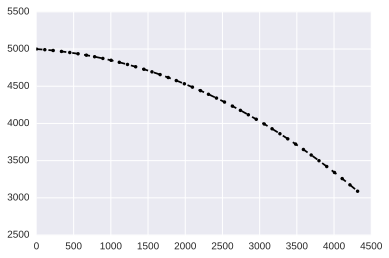

In [4]:
zguess = prob.Guess.Ballistic(model.si, tf=30)
tf, s  = prob.Guess.Ballistic(model.si, tf=30, nlp=False)
plt.plot(s[:,0], s[:,1], 'k.--')
plt.axes().set_aspect('equal', 'datalim')
plt.show()

In [4]:
pop = population(prob)
pop.push_back(zguess)

In [5]:
algo = algorithm.scipy_slsqp(max_iter=3000, screen_output=True)
alg1 = algorithm.mbh(algo, stop=1)

In [6]:
pop = alg1.evolve(pop)

  NIT    FC           OBJFUN            GNORM
    1   570    -9.489339E+03     1.000000E+00
    2  1140    -9.489232E+03     1.000000E+00
    3  1710    -9.488880E+03     1.000000E+00
    4  2280    -9.488353E+03     1.000000E+00
    5  2850    -9.487473E+03     1.000000E+00
    6  3420    -9.486179E+03     1.000000E+00
    7  3990    -9.484766E+03     1.000000E+00
    8  4560    -9.483547E+03     1.000000E+00
    9  5130    -9.481875E+03     1.000000E+00
   10  5700    -9.479847E+03     1.000000E+00
   11  6270    -9.477928E+03     1.000000E+00
   12  6840    -9.474904E+03     1.000000E+00
   13  7410    -9.469984E+03     1.000000E+00
   14  7980    -9.454509E+03     1.000000E+00
   15  8550    -9.441824E+03     1.000000E+00
   16  9120    -9.429061E+03     1.000000E+00
   17  9690    -9.407144E+03     1.000000E+00
   18 10260    -9.163434E+03     1.000000E+00
   19 10831    -9.067614E+03     1.000000E+00
   20 11402    -8.982269E+03     1.000000E+00
   21 11973    -8.916626E+03     1

In [18]:
tf, sb, cb, s, c = prob.Decode(pop.champion.x)

In [10]:
z = pop.champion.x
save("../Data/HSS/40Seg/HSS_40_Lunar_Base", z)

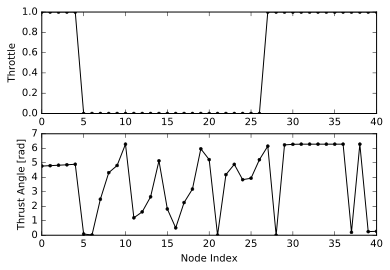

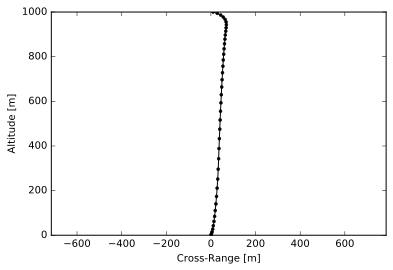

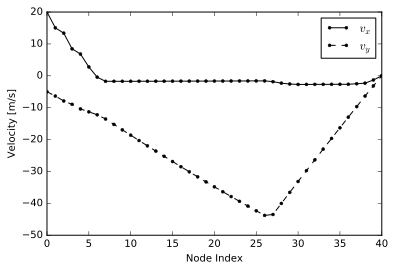

In [20]:
plt.close('all')
ax1 = plt.subplot(211)
plt.plot(c[:,0], 'k.-')
plt.ylabel("Throttle")
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(c[:,1], 'k.-')
plt.ylabel('Thrust Angle [rad]')
plt.xlabel("Node Index")

plt.figure()
plt.plot(s[:,0], s[:,1], 'k.-')
plt.axes().set_aspect('equal', 'datalim')
plt.xlabel("Cross-Range [m]")
plt.ylabel("Altitude [m]")

plt.figure()
plt.plot(s[:,2], 'k.-')
plt.plot(s[:,3], 'k.--')
plt.legend(["$v_x$", "$v_y$"], loc="best")
plt.xlabel("Node Index")
plt.ylabel("Velocity [m/s]")
plt.show()